讀取資料並再次計算後取得波動率與價格吻合的資料

In [2]:
import numpy as np
import pandas as pd
from function.function_black import vectorized_premium


expiry = 'NearbyMonth'
IV_Data = pd.read_csv('./../../Data/Organized/IV/{}/All.csv'.format(expiry),  encoding='Big5', index_col=False)
IV_matrix = np.array(IV_Data)


price_type = '結算價'

column_names_closing  = ['成交量', '期貨{}'.format(price_type), '履約價', '買賣權', price_type, \
                         '無風險利率', '到期天數', '隱含波動率({})'.format(price_type)]
column_index_closing = [IV_Data.columns.get_loc(col) for col in column_names_closing]
#nan_m = IV_matrix[np.isnan(IV)]
#F0 = np.array(IV_matrix[:, column_index_closing[1]])
#K = np.array(IV_matrix[:, column_index_closing[2]])
#c_p = np.array(IV_matrix[:, column_index_closing[3]])
#price = np.array(IV_matrix[:, column_index_closing[4]])
#r = np.array(IV_matrix[:, column_index_closing[5]])
#T = np.array(IV_matrix[:, column_index_closing[6]]) / 365
#IV_m = np.array(IV_matrix[:, column_index_closing[7]])
#Ep = vectorized_premium(c_p, F0, K, r, IV_m, T)
#error_m = abs(Ep - price)

#只選用計算後沒問題的資料
#IV_matrix = IV_matrix[error_m <= 1e-6 ]





隨便抽一天來畫買權跟賣權的曲線

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_17008\1771266546.py:45: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


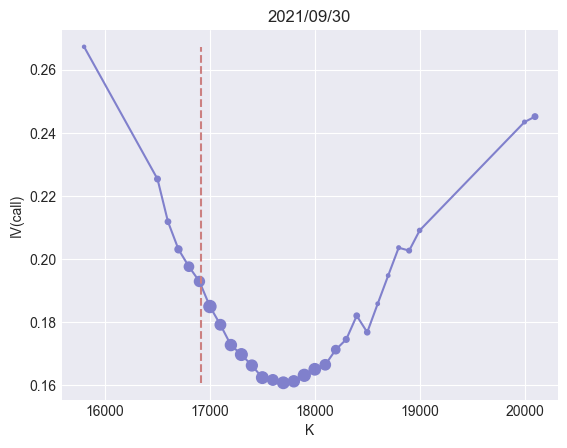

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


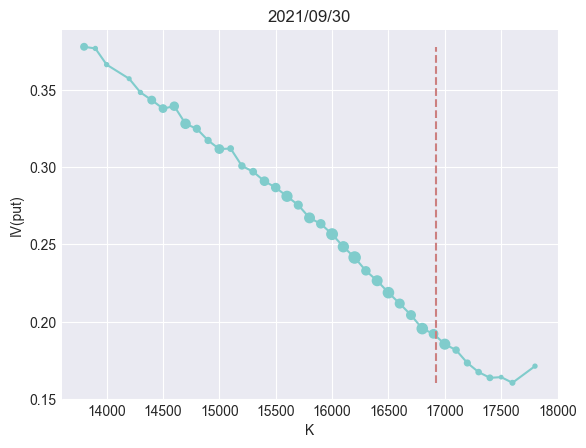

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


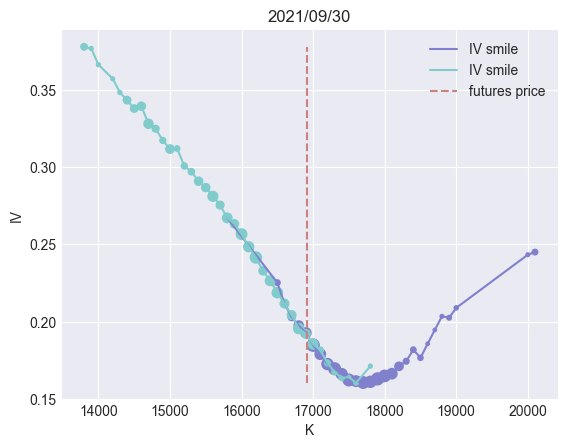

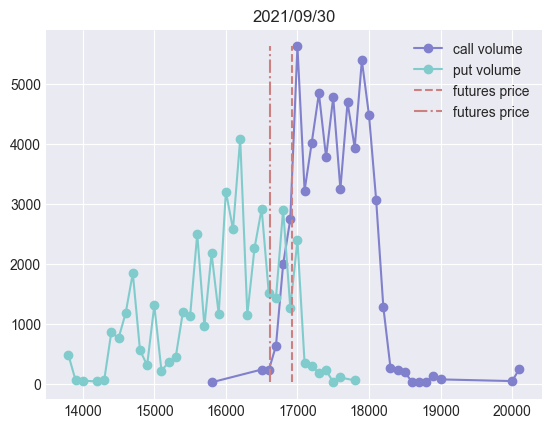

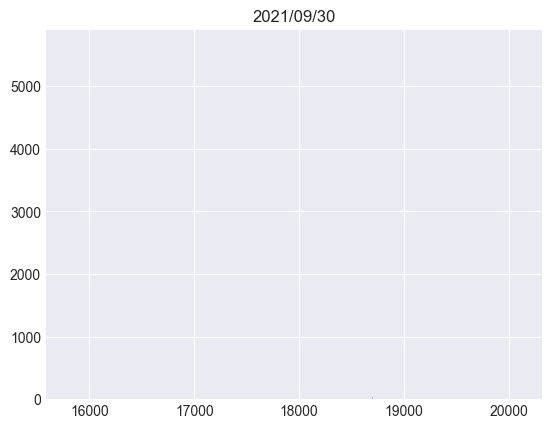

In [16]:

import matplotlib.pyplot as plt

dates = np.unique(IV_matrix[:,0])

date = np.random.choice(dates,1)[0]
date = '2021/09/30'


one_day_D = IV_matrix[IV_matrix[:,0] == date]
F_one_day = one_day_D[0:2, column_index_closing[1]]

call_D = one_day_D[one_day_D[:,column_index_closing[3]] == 'call'] 
put_D = one_day_D[one_day_D[:, column_index_closing[3]] == 'put'] 

#買權隱含波動率最大值
iv_call_max = call_D[:, column_index_closing[7]].max()
#賣權隱含波動率最大值
iv_put_max = put_D[:,column_index_closing[7]].max()
#買權隱含波動率最小值
iv_call_min = call_D[:,column_index_closing[7]].min()
#賣權隱含波動率最小值
iv_put_min = put_D[:,column_index_closing[7]].min()
#當天近月交易隱含波動率最大值
iv_max =  max(iv_call_max, iv_put_max)
#當天近月交易隱含波動率最小值
iv_min =  min(iv_call_min, iv_put_min)
#買權成交量
call_volume = (call_D[:, column_index_closing[0]]).astype(int)
#買權成交量取根號並四捨五入為整數，等等要做為圖中各履約價-隱含波動率圖中點的大小，方便看不同履約價的成交量的差距
sqrt_call_volume = np.around(np.sqrt(call_volume))
#賣權成交量
put_volume = (put_D[:, column_index_closing[0]]).astype(int)
sqrt_put_volume = np.around(np.sqrt(put_volume))




call_color = [0.5,0.5,0.8]
futures_color = [0.8, 0.5, 0.5]
put_color = [0.5, 0.8, 0.8]



#買權曲線
plt.style.use('seaborn-darkgrid')
plt.plot(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, label='IV smile')
plt.scatter(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, s=sqrt_call_volume)
plt.plot(F_one_day, [iv_call_min, iv_call_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV(call)')
plt.title(date)    
plt.show()

#賣權曲線
plt.plot(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
         c=put_color, label='IV smile')
plt.scatter(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
        c=put_color, s=sqrt_put_volume)
plt.plot(F_one_day, [iv_put_min, iv_put_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV(put)')
plt.title(date)    
plt.show()

#買賣權曲線畫在同張圖上
plt.plot(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, label='IV smile')
plt.scatter(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, s=sqrt_call_volume)
plt.plot(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
         c=put_color, label='IV smile')
plt.scatter(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
        c=put_color, s=sqrt_put_volume)
plt.plot(F_one_day, [iv_min, iv_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV')
plt.legend()
plt.title(date)    
plt.show()





#直接看不同履約價所對應之成交量
plt.plot(call_D[:, column_index_closing[2]], call_volume, c=call_color, marker='o', label='call volume')
plt.plot(put_D[:, column_index_closing[2]], put_volume, c=put_color, marker='o', label='put volume')
volume_max = np.max(np.hstack((call_volume, put_volume)))
volume_min = np.min(np.hstack((call_volume, put_volume)))
plt.plot(F_one_day, [volume_min, volume_max], ls='--', c=futures_color, label='futures price')
plt.plot(F_one_day-300, [volume_min, volume_max], ls='-.', c=futures_color, label='futures price')
plt.title(date)
#plt.plot(K_merge, volume_merge, c=megre_color, marker='o', label = 'sum volume')

plt.legend()
plt.show()


K = call_D[:, column_index_closing[2]]
#K = [[K[i]] * call_volume[i] for i in range(len(call_volume))]
#K= [item for sublist in K for item in sublist]

plt.bar(call_D[:, column_index_closing[2]], call_volume,  color='skyblue', width=0.5, align='center')
#plt.plot(put_D[:, column_index_closing[2]], put_volume, c=put_color, marker='o', label='put volume')
volume_max = np.max(call_volume)
volume_min = np.min(call_volume)
#plt.plot(F_one_day, [volume_min, volume_max], ls='--', c=futures_color, label='futures price')
plt.title(date)
#plt.plot(K_merge, volume_merge, c=megre_color, marker='o', label = 'sum volume')

plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


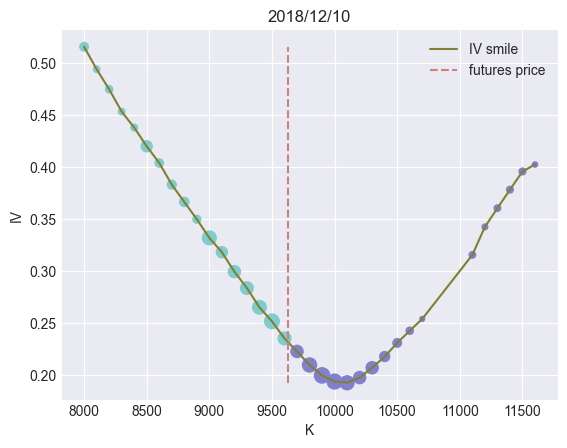

In [21]:
import numpy as np
import pandas as pd
from function.function_black import vectorized_premium


expiry = 'NearbyMonth'
IV_Data = pd.read_csv('./../../Data/Organized/ITMIV/{}.csv'.format(expiry),  encoding='Big5', index_col=False)
IV_matrix = np.array(IV_Data)


price_type = '收盤價'

column_names_closing  = ['成交量', '期貨{}'.format(price_type), '履約價', '買賣權', price_type, \
                         '無風險利率', '到期天數', '隱含波動率({})'.format(price_type)]
column_index_closing = [IV_Data.columns.get_loc(col) for col in column_names_closing]
#nan_m = IV_matrix[np.isnan(IV)]
#F0 = np.array(IV_matrix[:, column_index_closing[1]])
#K = np.array(IV_matrix[:, column_index_closing[2]])
#c_p = np.array(IV_matrix[:, column_index_closing[3]])
#price = np.array(IV_matrix[:, column_index_closing[4]])
#r = np.array(IV_matrix[:, column_index_closing[5]])
#T = np.array(IV_matrix[:, column_index_closing[6]]) / 365
#IV_m = np.array(IV_matrix[:, column_index_closing[7]])
#Ep = vectorized_premium(c_p, F0, K, r, IV_m, T)
#error_m = abs(Ep - price)

#只選用計算後沒問題的資料
#IV_matrix = IV_matrix[error_m <= 1e-6 ]


#買賣權合併的資料
IV_Data_merge = pd.read_csv('./../../Data/Organized/MergeIV/{}.csv'.format(expiry),  \
                            encoding='Big5', index_col=False)
IV_matrix_merge = np.array(IV_Data_merge)




import matplotlib.pyplot as plt

dates = np.unique(IV_matrix[:,0])

date = np.random.choice(dates,1)[0]
#date = '2022/04/01'


one_day_D = IV_matrix[IV_matrix[:,0] == date]
F_one_day = one_day_D[0:2, column_index_closing[1]]

call_D = one_day_D[one_day_D[:,column_index_closing[3]] == 'call'] 
put_D = one_day_D[one_day_D[:, column_index_closing[3]] == 'put'] 

#當天近月交易隱含波動率最大值
iv_max =  np.max(one_day_D[:, column_index_closing[7]])
#當天近月交易隱含波動率最小值
iv_min =  np.min(one_day_D[:, column_index_closing[7]])
#買權成交量
call_volume = (call_D[:, column_index_closing[0]]).astype(int)
#買權成交量取根號並四捨五入為整數，等等要做為圖中各履約價-隱含波動率圖中點的大小，方便看不同履約價的成交量的差距
sqrt_call_volume = np.around(np.sqrt(call_volume))
#賣權成交量
put_volume = (put_D[:, column_index_closing[0]]).astype(int)
sqrt_put_volume = np.around(np.sqrt(put_volume))



iv_color = [0.5, 0.5, 0.2]
call_color = [0.5,0.5,0.8]
futures_color = [0.8, 0.5, 0.5]
put_color = [0.5, 0.8, 0.8]


#買賣權曲線畫在同張圖上
plt.plot(one_day_D[:,column_index_closing[2]], one_day_D[:,column_index_closing[7]], \
        c=iv_color, label='IV smile')
plt.scatter(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, s=sqrt_call_volume)
plt.scatter(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
        c=put_color, s=sqrt_put_volume)
plt.plot(F_one_day, [iv_min, iv_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV')
plt.legend()
plt.title(date)    
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_28048\4132716935.py:40: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


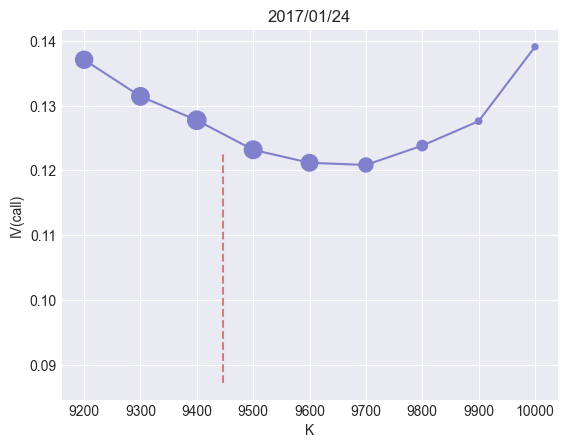

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


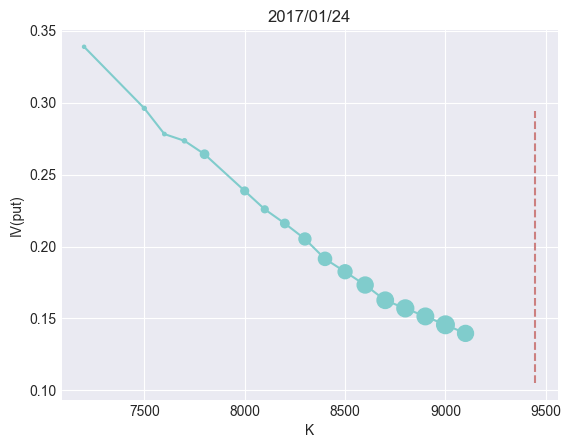

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


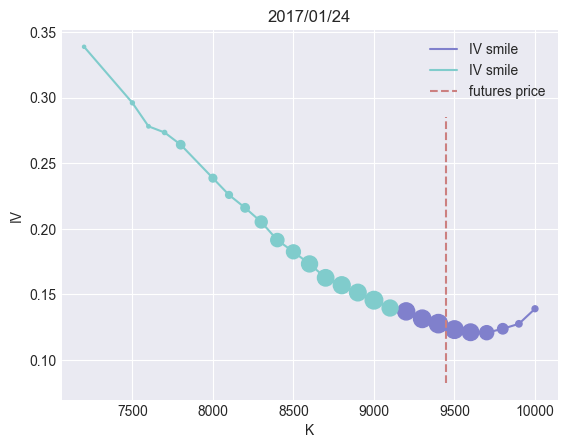

In [14]:
import matplotlib.pyplot as plt

dates = np.unique(IV_matrix[:,0])

date = np.random.choice(dates,1)[0]
#date = '2022/04/01'


one_day_D = IV_matrix[IV_matrix[:,0] == date]
F_one_day = one_day_D[0:2, column_index_closing[1]]



#隱含波動率最大值
iv_max = np.max(one_day_D[:, column_index_closing[7]])
iv_min = np.min(one_day_D[:, column_index_closing[7]])
#成交量
volume = (one_day_D[:, column_index_closing[0]]).astype(int)
#成交量取根號並四捨五入為整數，等等要做為圖中各履約價-隱含波動率圖中點的大小，方便看不同履約價的成交量的差距
sqrt_volume = np.around(np.sqrt(volume))


column_names_merge_closing = ['成交量({})'.format(price_type), '隱含波動率({})'.format(price_type),\
                              '履約價']
column_index_merge_closing = [IV_Data_merge.columns.get_loc(col) for col in column_names_merge_closing]
one_day_merge = IV_matrix_merge[np.equal(IV_matrix_merge[:, 0], date)]
iv_merge = one_day_merge[:, column_index_merge_closing[1]]
K_merge = one_day_merge[:, column_index_merge_closing[2]]
volume_merge = one_day_merge[:, column_index_merge_closing[0]].astype(int)
sqrt_volume = np.around(np.sqrt(volume_merge))


call_color = [0.5,0.5,0.8]
futures_color = [0.8, 0.5, 0.5]
put_color = [0.5, 0.8, 0.8]
megre_color = [0.5, 0.5, 0.3]


#買權曲線
plt.style.use('seaborn-darkgrid')
plt.plot(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, label='IV smile')
plt.scatter(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, s=sqrt_call_volume)
plt.plot(F_one_day, [iv_call_min, iv_call_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV(call)')
plt.title(date)    
plt.show()

#賣權曲線
plt.plot(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
         c=put_color, label='IV smile')
plt.scatter(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
        c=put_color, s=sqrt_put_volume)
plt.plot(F_one_day, [iv_put_min, iv_put_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV(put)')
plt.title(date)    
plt.show()

#買賣權曲線畫在同張圖上
plt.plot(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, label='IV smile')
plt.scatter(call_D[:,column_index_closing[2]], call_D[:,column_index_closing[7]], \
        c=call_color, s=sqrt_call_volume)
plt.plot(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
         c=put_color, label='IV smile')
plt.scatter(put_D[:,column_index_closing[2]], put_D[:,column_index_closing[7]], \
        c=put_color, s=sqrt_put_volume)
plt.plot(F_one_day, [iv_min, iv_max], ls='--', c=futures_color, \
         label = 'futures price')
plt.xlabel('K')
plt.ylabel('IV')
plt.legend()
plt.title(date)    
plt.show()





